In [1]:
!mkdir notebooks


In [ ]:
mv image_preprocessing.ipynb notebooks/


In [3]:
import os
print(os.getcwd())


/Users/jacobbanov/Desktop/School/CS_5262-ML/Project/Repository/Brain-Tumor-Classification/notebooks


In [4]:
data_dir = "../data/train"  # Use .. to move up from notebooks/


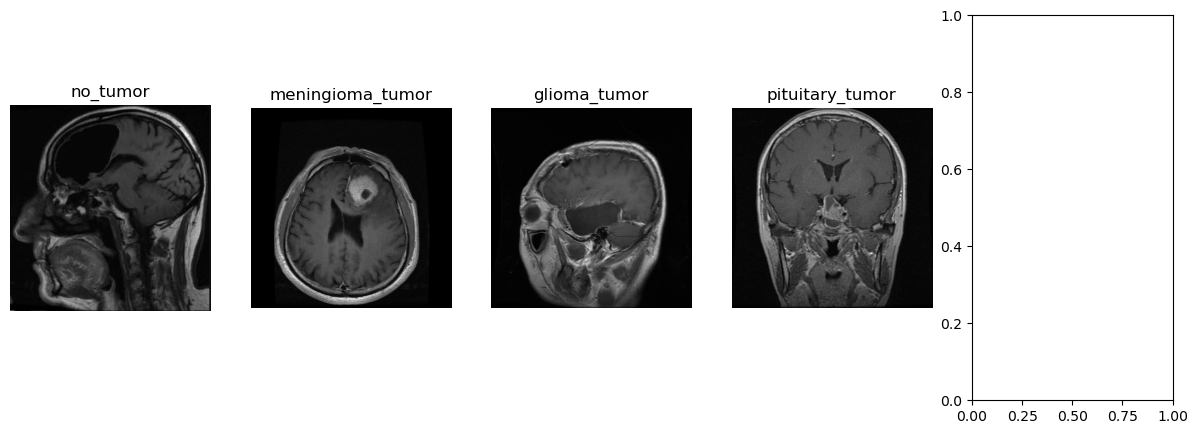

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define paths
data_dir = "../data/train"
categories = os.listdir(data_dir)  # List tumor categories

# Load and display sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, category in enumerate(categories[:5]):  # Show first 5 categories
    img_path = os.path.join(data_dir, category, os.listdir(os.path.join(data_dir, category))[0])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    axes[i].imshow(img, cmap="gray")
    axes[i].set_title(category)
    axes[i].axis("off")

plt.show()


In [11]:
mkdir -p ../data/train_axial ../data/train_sagittal


In [18]:
import os
import cv2
import shutil
import numpy as np

# Define paths
data_dir = "../data/training"
axial_dir = "../data/train_axial"
coronal_dir = "../data/train_coronal"
sagittal_dir = "../data/train_sagittal"
unknown_dir = "../data/train_unknown"

# Ensure directories exist
os.makedirs(axial_dir, exist_ok=True)
os.makedirs(coronal_dir, exist_ok=True)
os.makedirs(sagittal_dir, exist_ok=True)
os.makedirs(unknown_dir, exist_ok=True)

# Function to classify image orientation
def classify_mri_orientation(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return "unknown"

    height, width = img.shape
    aspect_ratio = width / height  # Check shape elongation

    # Apply edge detection (Canny)
    edges = cv2.Canny(img, 50, 150)
    edge_sum_vertical = np.sum(edges, axis=0)  # Sum edges in vertical direction
    edge_sum_horizontal = np.sum(edges, axis=1)  # Sum edges in horizontal direction

    vertical_edges = np.sum(edge_sum_vertical)
    horizontal_edges = np.sum(edge_sum_horizontal)

    # Heuristic-based sorting
    if aspect_ratio > 1.1 and horizontal_edges > vertical_edges:
        return "axial"
    elif aspect_ratio < 0.9 and vertical_edges > horizontal_edges:
        return "sagittal"
    elif 0.9 <= aspect_ratio <= 1.1:
        return "coronal"
    else:
        return "unknown"

# Process each image in the dataset
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)

        orientation = classify_mri_orientation(img_path)

        if orientation == "axial":
            target_dir = os.path.join(axial_dir, category)
        elif orientation == "coronal":
            target_dir = os.path.join(coronal_dir, category)
        elif orientation == "sagittal":
            target_dir = os.path.join(sagittal_dir, category)
        else:
            target_dir = os.path.join(unknown_dir, category)

        os.makedirs(target_dir, exist_ok=True)
        shutil.move(img_path, os.path.join(target_dir, img_name))

        print(f"✅ Moved {img_name} → {orientation} ({img.shape[1]}x{img.shape[0]})")

print("🎯 MRI Sorting Complete!")


✅ Moved image(115).jpg → coronal (892x826)
✅ Moved image(142).jpg → coronal (892x826)
✅ Moved image(49).jpg → coronal (892x826)
✅ Moved image(1).jpg → unknown (892x826)
✅ Moved image(284).jpg → coronal (892x826)
✅ Moved image(154).jpg → coronal (892x826)
✅ Moved image(292).jpg → unknown (892x826)
✅ Moved image(103).jpg → unknown (892x826)
✅ Moved image(197).jpg → coronal (892x826)
✅ Moved image(178).jpg → coronal (892x826)
✅ Moved image(73).jpg → unknown (892x826)
✅ Moved image(251).jpg → unknown (892x826)
✅ Moved image(314).jpg → coronal (892x826)
✅ Moved image(24).jpg → coronal (892x826)
✅ Moved image (26).jpg → coronal (892x826)
✅ Moved image(206).jpg → coronal (892x826)
✅ Moved image (5).jpg → coronal (892x826)
✅ Moved image(139).jpg → unknown (892x826)
✅ Moved image(32).jpg → unknown (892x826)
✅ Moved image(210).jpg → unknown (892x826)
✅ Moved image (30).jpg → coronal (892x826)
✅ Moved image(181).jpg → coronal (892x826)
✅ Moved image(65).jpg → unknown (892x826)
✅ Moved image(247).

In [33]:
import os
import cv2
import numpy as np

# Define paths
path_train = "../data/training/"
path_test = "../data/testing/"
img_size = 300  # Resized image size

# Initialize lists
train_img, train_labels = [], []
test_img, test_labels = [], []

# Function to load images safely and check for black images
def load_images_from_directory(directory, img_list, label_list, dataset_name):
    black_image_count = 0

    for category in os.listdir(directory):  # Loop through class folders
        category_path = os.path.join(directory, category)

        # 🛑 Skip non-directory files (e.g., .DS_Store)
        if not os.path.isdir(category_path):
            continue
        
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)

            # Read image
            img = cv2.imread(img_path)
            if img is None:
                print(f"⚠️ Warning: Failed to load {img_path}, skipping.")
                continue  # Skip corrupt images

            # Resize image
            img = cv2.resize(img, (img_size, img_size))

            # Check if image is completely black (all zeros)
            if np.all(img == 0):
                black_image_count += 1
                print(f"⚠️ Warning: Black image detected: {img_path}, skipping.")
                continue  # Skip black images
            
            # Append to lists
            img_list.append(img)
            label_list.append(category)

    print(f"⚠️ {black_image_count} completely black images found in {dataset_name} data.")

# Load training images
load_images_from_directory(path_train, train_img, train_labels, "training")

# Load testing images
load_images_from_directory(path_test, test_img, test_labels, "test")

# Convert lists to numpy arrays
train_img = np.array(train_img)
test_img = np.array(test_img)

# Encode labels: 0 - No Tumor, 1 - Glioma, 2 - Meningioma, 3 - Pituitary
label_mapping = {"no_tumor": 0, "glioma_tumor": 1, "meningioma_tumor": 2, "pituitary_tumor": 3}
train_labels_encoded = np.array([label_mapping[label] for label in train_labels])
test_labels_encoded = np.array([label_mapping[label] for label in test_labels])

print(f"Loaded {len(train_img)} training images and {len(test_img)} test images.")
print(f"Labels: {np.unique(train_labels_encoded, return_counts=True)}")


⚠️ 0 completely black images found in training data.
⚠️ 0 completely black images found in test data.
Loaded 2870 training images and 394 test images.
Labels: (array([0, 1, 2, 3]), array([395, 826, 822, 827]))


In [32]:
train_img


array([[[[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  9,   9,   9],
         [ 12,  12,  12],
         [ 13,  13,  13]],

        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  9,   9,   9],
         [ 12,  12,  12],
         [ 13,  13,  13]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  9,   9,   9],
         [ 12,  12,  12],
         [ 13,  13,  13]],

        ...,

        [[  2,   2,   2],
         [  2,   2,   2],
         [  3,   3,   3],
         ...,
         [ 51,  51,  51],
         [ 21,  21,  21],
         [ 13,  13,  13]],

        [[ 23,  23,  23],
         [ 21,  21,  21],
         [ 21,  21,  21],
         ...,
         [ 46,  46,  46],
         [ 20,  20,  20],
         [ 15,  15,  15]],

        [[ 79,  79,  79],
         [ 74,  74,  74],
         [ 72,  72,  72],
         ...,
         [ 32,  32,  32],
        